In [4]:
#performing Decision Tree on Breast cancer wisconsis

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
import pandas as pd

In [7]:
df=pd.read_csv("C:/Users/91861/Downloads/data.csv")
df.drop('id',axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
M=df[df['diagnosis']=='M']
B=df[df['diagnosis']=='B']

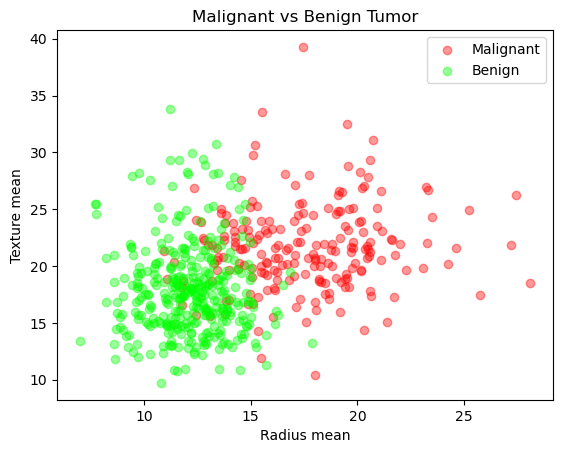

In [9]:
import matplotlib.pyplot as plt
plt.title('Malignant vs Benign Tumor')
plt.xlabel('Radius mean')
plt.ylabel('Texture mean')
plt.scatter(M.radius_mean,M.texture_mean,c='r',label='Malignant',alpha=0.4)
plt.scatter(B.radius_mean,B.texture_mean,c='lime',label='Benign',alpha=0.4)
plt.legend()
plt.show()

In [20]:
#Using Encoder function ( LabelEncoder)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [22]:
#Assigning Dependent and Independent Variables

In [24]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis.values

In [26]:
x.shape,y.shape

((569, 32), (569,))

In [28]:
#Splitting Training and Testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398, 32), (171, 32), (398,), (171,))

In [32]:
x_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
149,869931,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,...,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014,NaN
124,865468,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,...,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628,NaN
421,906564,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,...,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208,NaN
195,875878,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,NaN
545,922576,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,...,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,NaN
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,NaN
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,NaN
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,NaN


In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=dt.predict(x_test)

In [43]:
cm=confusion_matrix(y_test,y_pred)

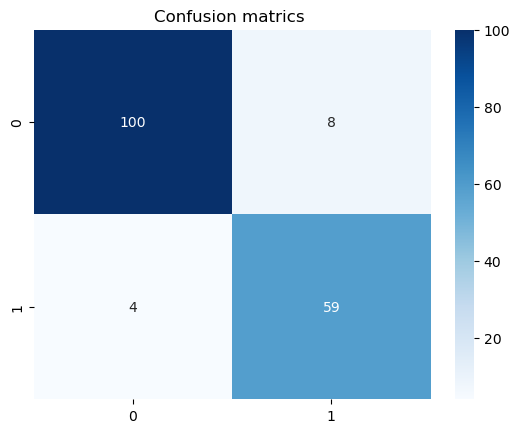

Accuracy of the classifier model is 0.9298245614035088


In [45]:
import seaborn as s
import matplotlib.pyplot as m
cm = confusion_matrix(y_test,y_pred)
s.heatmap(cm,annot=True,fmt='d',cmap="Blues")
m.title("Confusion matrics ")
m.show()
print("Accuracy of the classifier model is",accuracy_score(y_test,y_pred))
